## Exercise 1 Frequency Resolution

In [647]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from typing import Union, Tuple

def create_signal(signal, sign_freq: Union[int, float], sign_amplitude: Union[int, float], sign_length: int, sampling_freq: int) -> Tuple[np.ndarray, np.ndarray]:
    '''
    Creates the signal with specified parameters.
    
    Args:
        signal: The signal that will be created.
        sign_freq Union[int, float]: Frequency of the signal.
        sign_amplitude Union[int, float]: Amplitude of the signal.
        sign_length int: Number of samples.
        sampling_freq int: Sampling frequency.

    Return:
        Tuple[np.ndarray, np.ndarray]: (Time vector, Signal values vector)
    '''
    
    # Signal length
    Ns = sign_length
    # Sampling frequency
    fs = sampling_freq
    # Sampling period
    dt = 1 / fs
    # Time vector
    t = np.arange(0, Ns) * dt

    return t, sign_amplitude * signal(2 * np.pi * sign_freq * t)

### Sinus_1_500 -> 500 Samples, 500 Sampling Frequency [Hz], 30 Signal Frequency [Hz], 1 Amplitude
### Sinus_2_500 -> 500 Samples, 500 Sampling Frequency [Hz], 30.5 Signal Frequency [Hz], 2 Amplitude

In [649]:
Ns = 500  # Samples (Signal length)
fs = 500  # Sampling frequency

# Sin_1 -> 500 Samples, 500 Sampling Frequency [Hz], 30 Signal Frequency [Hz], 1 Amplitude
t_500, sin_1_500 = create_signal(
    signal=np.sin,
    sign_freq=30,
    sign_amplitude=1,
    sign_length=Ns,
    sampling_freq=fs
)

# Sin_2 -> 500 Samples, 500 Sampling Frequency [Hz], 30.5 Signal Frequency [Hz], 2 Amplitude
t_500, sin_2_500 = create_signal(
    signal=np.sin,
    sign_freq=30.5,
    sign_amplitude=2,
    sign_length=Ns,
    sampling_freq=fs
)

# Sum of the signal (sin_1 + sin_2)
y_500 = sin_1_500 + sin_2_500

Signal y_500 is a signal that was created from the sum of signals with lengths of 500

### Sinus_1_500 -> 2000 Samples, 500 Sampling Frequency [Hz], 30 Signal Frequency [Hz], 1 Amplitude
### Sinus_2_500 -> 2000 Samples, 500 Sampling Frequency [Hz], 30.5 Signal Frequency [Hz], 2 Amplitude

In [650]:
Ns = 500 * 4  # Samples (Signal length)
fs = 500  # Sampling frequency

# Sin_1 -> 2000 Samples, 500 Sampling Frequency [Hz], 30 Signal Frequency [Hz], 1 Amplitude
t_2000, sin_1_2000 = create_signal(
    signal=np.sin,
    sign_freq=30,
    sign_amplitude=1,
    sign_length=Ns,
    sampling_freq=fs
)

# Sin_2 -> 2000 Samples, 500 Sampling Frequency [Hz], 30.5 Signal Frequency [Hz], 2 Amplitude
t_2000, sin_2_2000 = create_signal(
    signal=np.sin,
    sign_freq=30.5,
    sign_amplitude=2,
    sign_length=Ns,
    sampling_freq=fs
)

# Sum of the signal (sin_1 + sin_2)
y_2000 = sin_1_2000 + sin_2_2000

Signal y_2000 is a signal that was created from the sum of signals with lengths of 2000

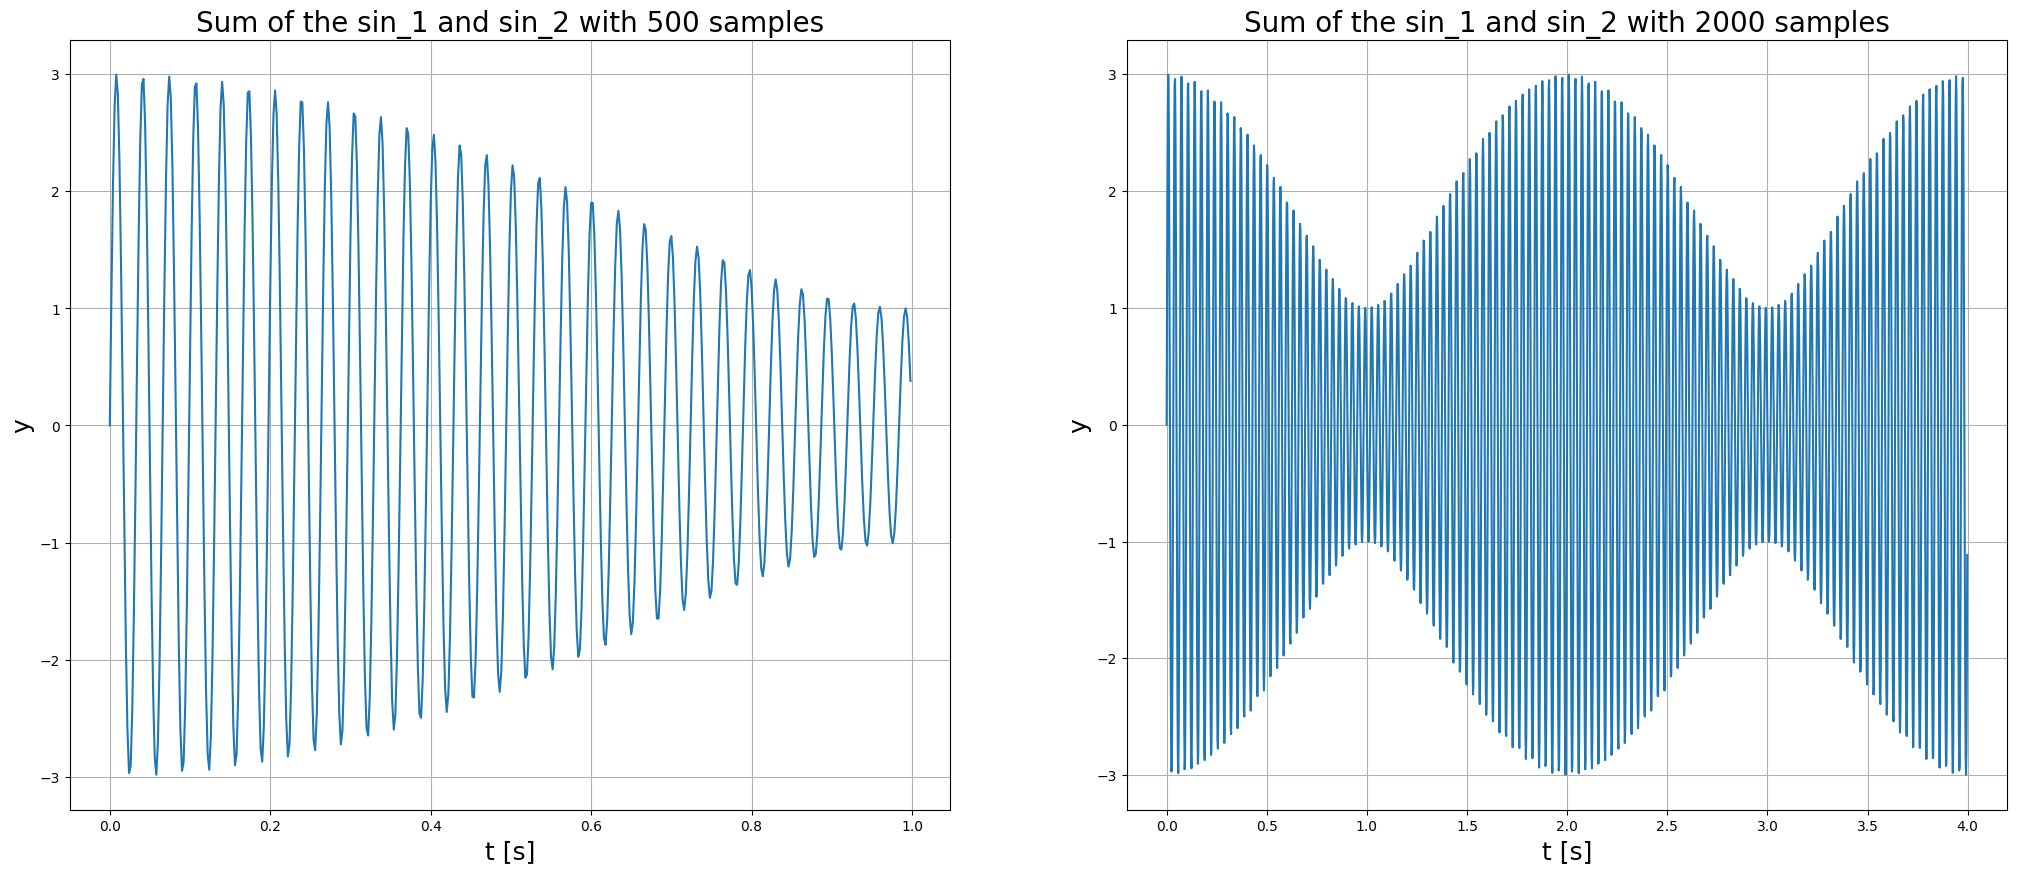

In [651]:
# Creates figure and axes
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(25, 10))

# y with 500 signal length
ax[0].plot(t_500, y_500)

ax[0].set_title('Sum of the sin_1 and sin_2 with 500 samples', fontsize=20)
ax[0].set_xlabel('t [s]', fontsize=18)
ax[0].set_ylabel('y', fontsize=18)
ax[0].grid()

# y with 2000 signal length
ax[1].plot(t_2000, y_2000)

ax[1].set_title('Sum of the sin_1 and sin_2 with 2000 samples', fontsize=20)
ax[1].set_xlabel('t [s]', fontsize=18)
ax[1].set_ylabel('y', fontsize=18)
ax[1].grid()

plt.show()

### Fourier Transform (FFT)

In [652]:
# Fourier transformation for signal with 500 samples
N_500 = len(y_500)
Y_500 = (abs(np.fft.fft(y_500)) / N_500) * 2
df_500 = fs / N_500                    # Frequency resolution
fv_500 = np.arange(0, N_500) * df_500  # Frequency vector

In [653]:
# Fourier transformation for signal with 2000 samples
N_2000 = len(y_2000)
Y_2000 = (abs(np.fft.fft(y_2000)) / N_2000) * 2
df_2000 = fs / N_2000                     # Frequency resolution
fv_2000 = np.arange(0, N_2000) * df_2000  # Frequency vector

### Comparison of signal spectra for signals of 500 and 2000 samples

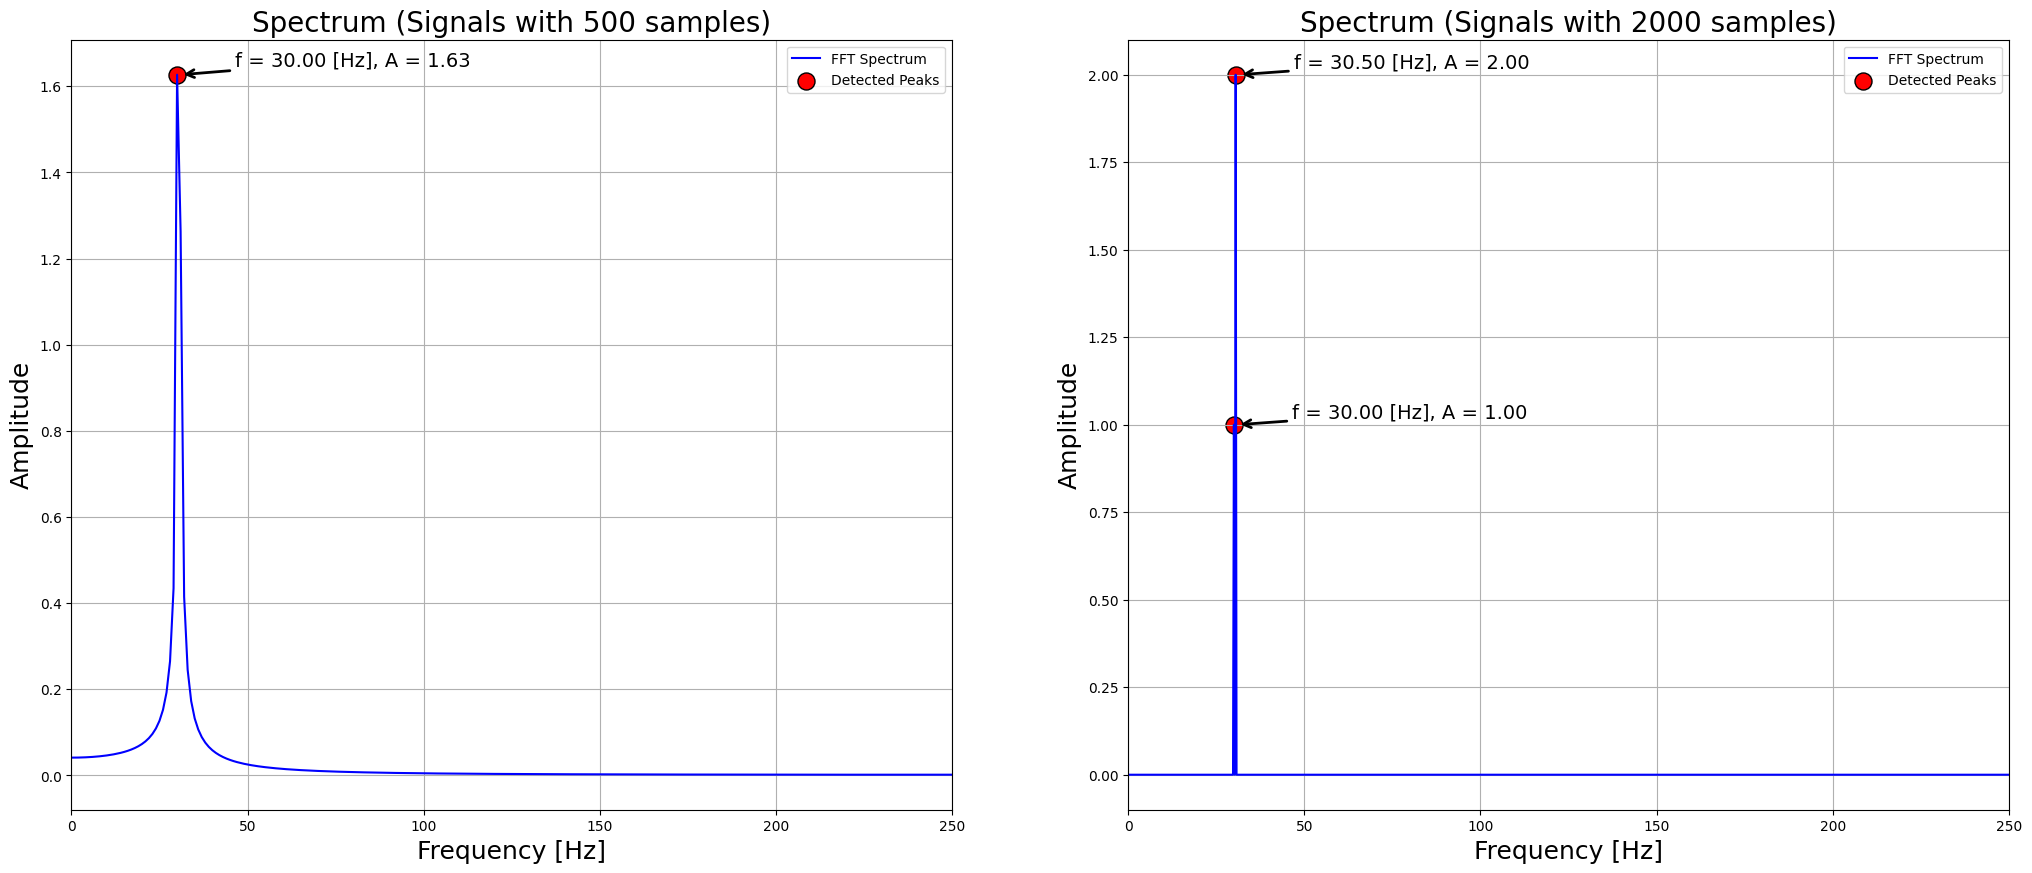

In [654]:
from scipy.signal import find_peaks

# Fourier Transformations for signals of 500 and 2000 samples
fourier_transformations = [Y_500, Y_2000]
# Frequency vector for theses signals
frequency_vectors = [fv_500, fv_2000]

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(25, 10))
for idx, (Y, fv) in enumerate(zip(fourier_transformations, frequency_vectors)):
    # Find peaks
    peaks, _ = find_peaks(Y, height=0.05)

    # Plot Spectrum Frequency
    ax[idx].plot(fv, Y, label="FFT Spectrum", color="blue")
    # Add detected peaks
    ax[idx].scatter(fv[peaks], Y[peaks], color='red', s=150, edgecolors='black', label="Detected Peaks")

    # Annotate peaks with arrows
    for peak in peaks[:int(len(peaks) / 2)]:
        f = fv[peak]
        A = Y[peak]
        ax[idx].annotate(f"f = {f:.2f} [Hz], A = {A:.2f}",
                    xy=(fv[peak] + 1, Y[peak]),  # Start point of the arrow
                    xytext=(fv[peak] + 50, Y[peak] + 0.02),  # End point of the arrow
                    arrowprops=dict(facecolor='black', arrowstyle='->', lw=2),
                    fontsize=14,
                    ha='center')

    # Labels and legend
    ax[idx].set_xlabel('Frequency [Hz]', fontsize=18)
    ax[idx].set_ylabel('Amplitude', fontsize=18)
    ax[idx].set_xlim(0, fs / 2)
    ax[idx].legend()
    ax[idx].grid()

# Titles
ax[0].set_title('Spectrum (Signals with 500 samples)', fontsize=20)
ax[1].set_title('Spectrum (Signals with 2000 samples)', fontsize=20)    

plt.show()

The relationship between signal length and frequency resolution  

Frequency Resolution:
$$
df = \frac{f_s}{N}
$$

Where:  
$$
f_s \quad \text{- Sampling frequency of the signal}
$$  
$$
N \quad \text{- Number of samples of the signal}
$$


Frequency resolution is the smaller detectable difference between two spectral components. Two frequency components of a signal that are less than df apart will be considered the same value in the spectrum.

As we can see, the frequency resolution depends on the sampling rate and the length of the signal. Thus, we can say that the longer the signal is, the more accurate spectrum we will get.  


In the case of the chart on the left, which shows the spectrum of a signal composed of the sum of 2 signals with 500 samples:

- Sinus_1_500 -> 500 Samples, 500 Sampling Frequency [Hz], 30 Signal Frequency [Hz], 1 Amplitude 
- Sinus_2_500 -> 500 Samples, 500 Sampling Frequency [Hz], 30.5 Signal Frequency [Hz], 2 Amplitude  


we can notice only 1 peak. This is dute to a too low number of samples by which the freqency resolution does not capture the second signal.


In the  chart on the right, which shows the spectrum of a signal composed of the sum of 2 signals with 2000 samples:

- Sinus_1_2000 -> 2000 Samples, 500 Sampling Frequency [Hz], 30 Signal Frequency [Hz], 1 Amplitude 
- Sinus_2_2000 -> 2000 Samples, 500 Sampling Frequency [Hz], 30.5 Signal Frequency [Hz], 2 Amplitude  


we can already notice 2 peaks, it is the correct result because this signal was made from 2 signals with f=30 Hz, A=1 and f=30.5 Hz, A=2.


## Exercise 2 Spectral leakage and Windowing


### 2.1 Create the signal and plot the spectrum
### Signal Length = 101

#### Sinus_101 -> 101 Samples, 100 Sampling Frequency [Hz], 7 Signal Frequency [Hz], 10 Amplitude
#### Cosinus_101 -> 101 Samples, 100 Sampling Frequency [Hz], 20 Signal Frequency [Hz], 0.02 Amplitude

In [655]:
Ns = 101  # Samples (Signal length)
fs = 100  # Frequency sampling

# Sin ->  101 Samples, 100 Sampling Frequency [Hz], 7 Signal Frequency [Hz], 10 Amplitude
t_101, sin_101 = create_signal(
    np.sin,
    sign_freq=7,
    sign_amplitude=10,
    sign_length=Ns,
    sampling_freq=fs
)

# Cos -> 101 Samples, 100 Sampling Frequency [Hz], 20 Signal Frequency [Hz], 0.02 Amplitude
t_101, cos_101 = create_signal(
    np.cos,
    sign_freq=20,
    sign_amplitude=0.02,
    sign_length=Ns,
    sampling_freq=fs
)

# Sum of the signal (sin_1 + sin_2)
y_1_101 = sin_101 + cos_101

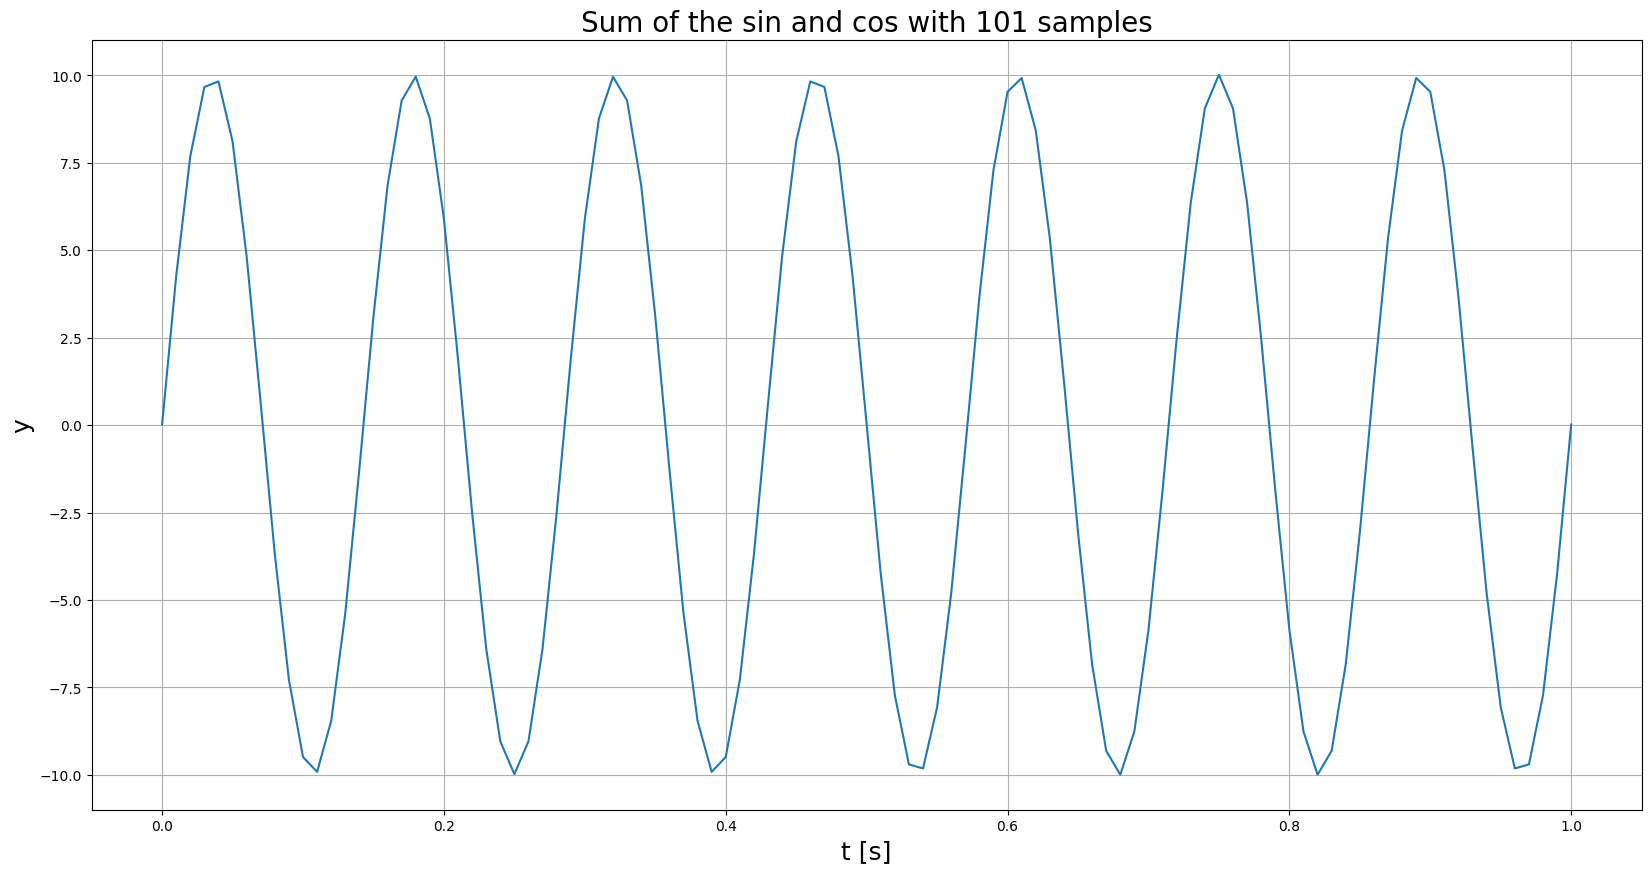

In [656]:
plt.figure(figsize=(20, 10))
plt.plot(t_101, y_1_101)
plt.title('Sum of the sin and cos with 101 samples', fontsize=20)
plt.xlabel('t [s]', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.grid()
plt.show()

#### Fourier Transform for signal of 101 samples

In [657]:
# Fourier transformation for signal with 101 samples
N_101 = len(y_1_101)  
Y_101 = np.fft.fft(y_1_101)  # Fourier
df_101 = fs / N_101  # Frequency resolution
fv_101 = np.arange(0, N_101) * df_101  # Frequency vector

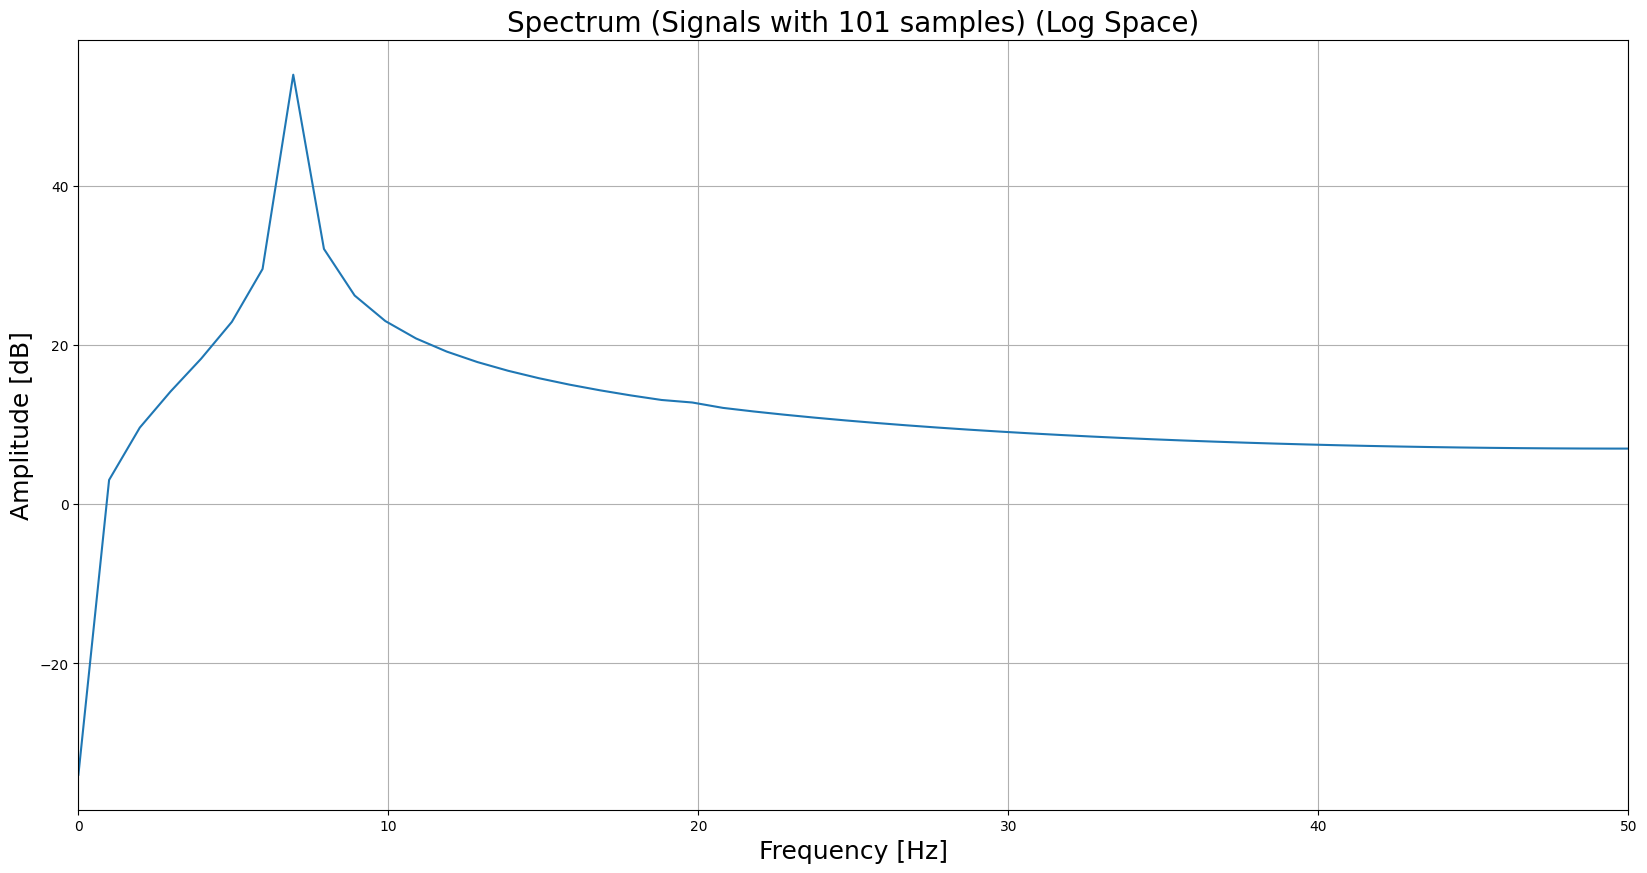

In [658]:
plt.figure(figsize=(20, 10))
plt.plot(fv_101, 20 * np.log10(abs(Y_101)))
plt.title('Spectrum (Signals with 101 samples) (Log Space)', fontsize=20)
plt.xlabel('Frequency [Hz]', fontsize=18)
plt.ylabel('Amplitude [dB]', fontsize=18)
plt.xlim(0, fs / 2)
plt.grid()
plt.show()

### 2.2 Change in the number of samples
### Signal Length = 100

#### Sinus_100 -> 100 Signal Length, 100 Sampling Frequency [Hz], 7 Signal Frequency [Hz], 10 Amplitude
#### Cosinus_100 -> 100 Signal Length, 100 Sampling Frequency [Hz], 20 Signal Frequency [Hz], 0.02 Amplitude

In [659]:
Ns = 100  # Samples (Signal length)
fs = 100  # Sampling frequency

# Sin -> 100 Signal Length, 100 Sampling Frequency [Hz], 7 Signal Frequency [Hz], 10 Amplitude
t_100, sin_100 = create_signal(
    np.sin,
    sign_freq=7,
    sign_amplitude=10,
    sign_length=Ns,
    sampling_freq=fs
)

# Cos -> 100 Signal Length, 100 Sampling Frequency [Hz], 20 Signal Frequency [Hz], 0.02 Amplitude
t_100, cos_100 = create_signal(
    np.cos,
    sign_freq=20,
    sign_amplitude=0.02,
    sign_length=Ns,
    sampling_freq=fs
)

# Sum of the signal (sin_1 + sin_2)
y_1_100 = sin_100 + cos_100

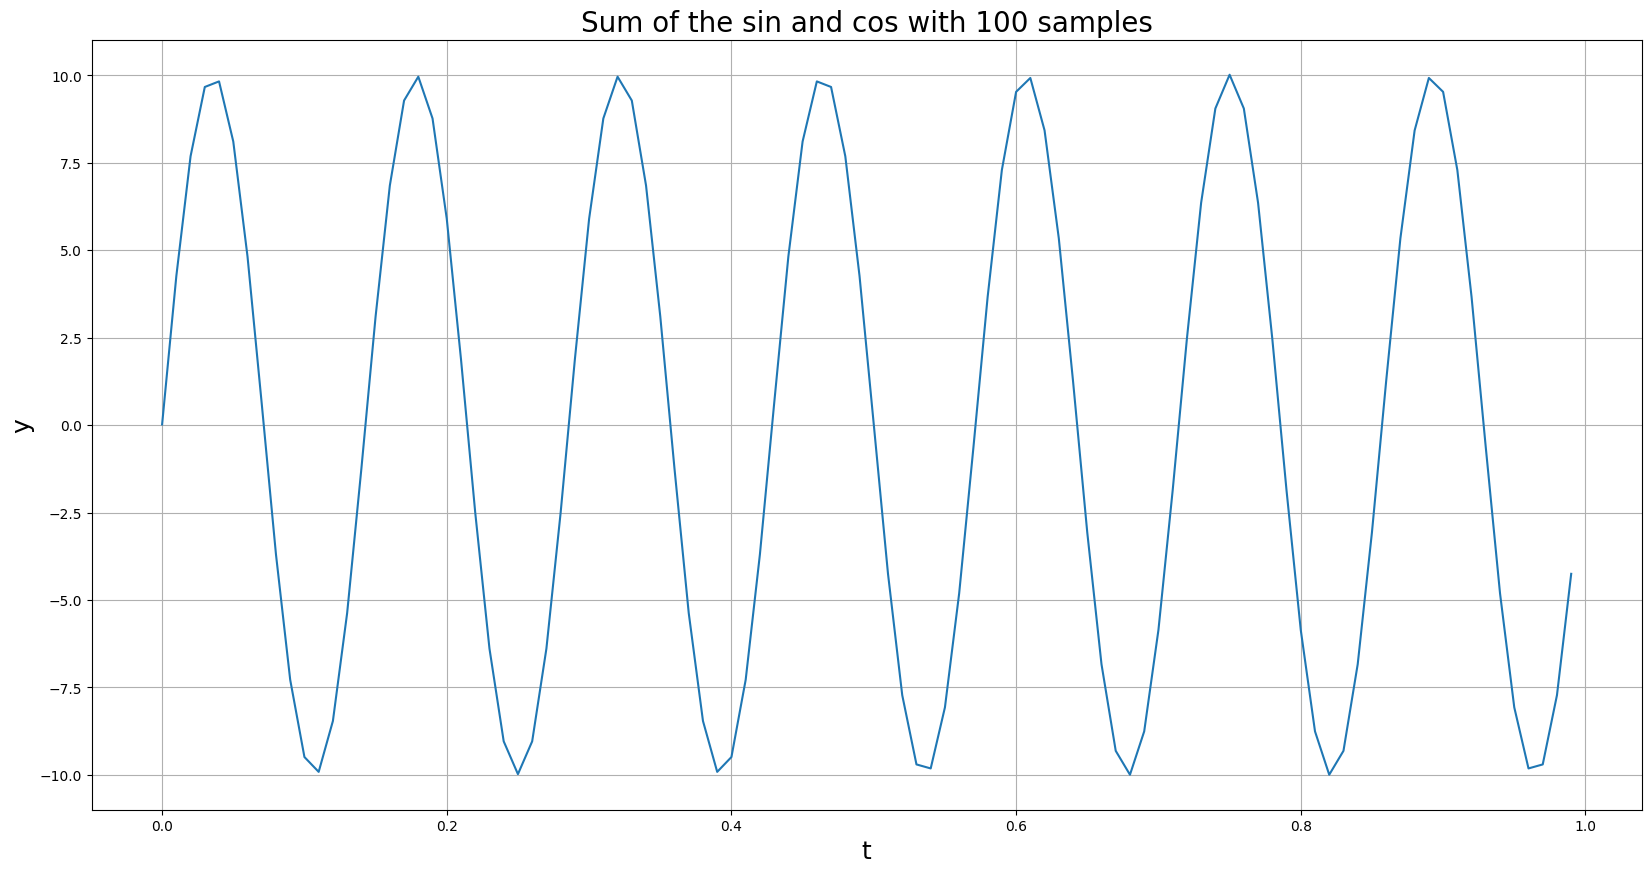

In [660]:
plt.figure(figsize=(20, 10))
plt.plot(t_100, y_1_100)
plt.title('Sum of the sin and cos with 100 samples', fontsize=20)
plt.xlabel('t', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.grid()
plt.show()

#### Fourier Transform for signal of 100 samples

In [661]:
# Fourier transformation for signal with 500 samples
N_100 = len(y_1_100)
Y_100 = np.fft.fft(y_1_100)
df_100 = fs / N_100
fv_100 = np.arange(0, N_100) * df_100

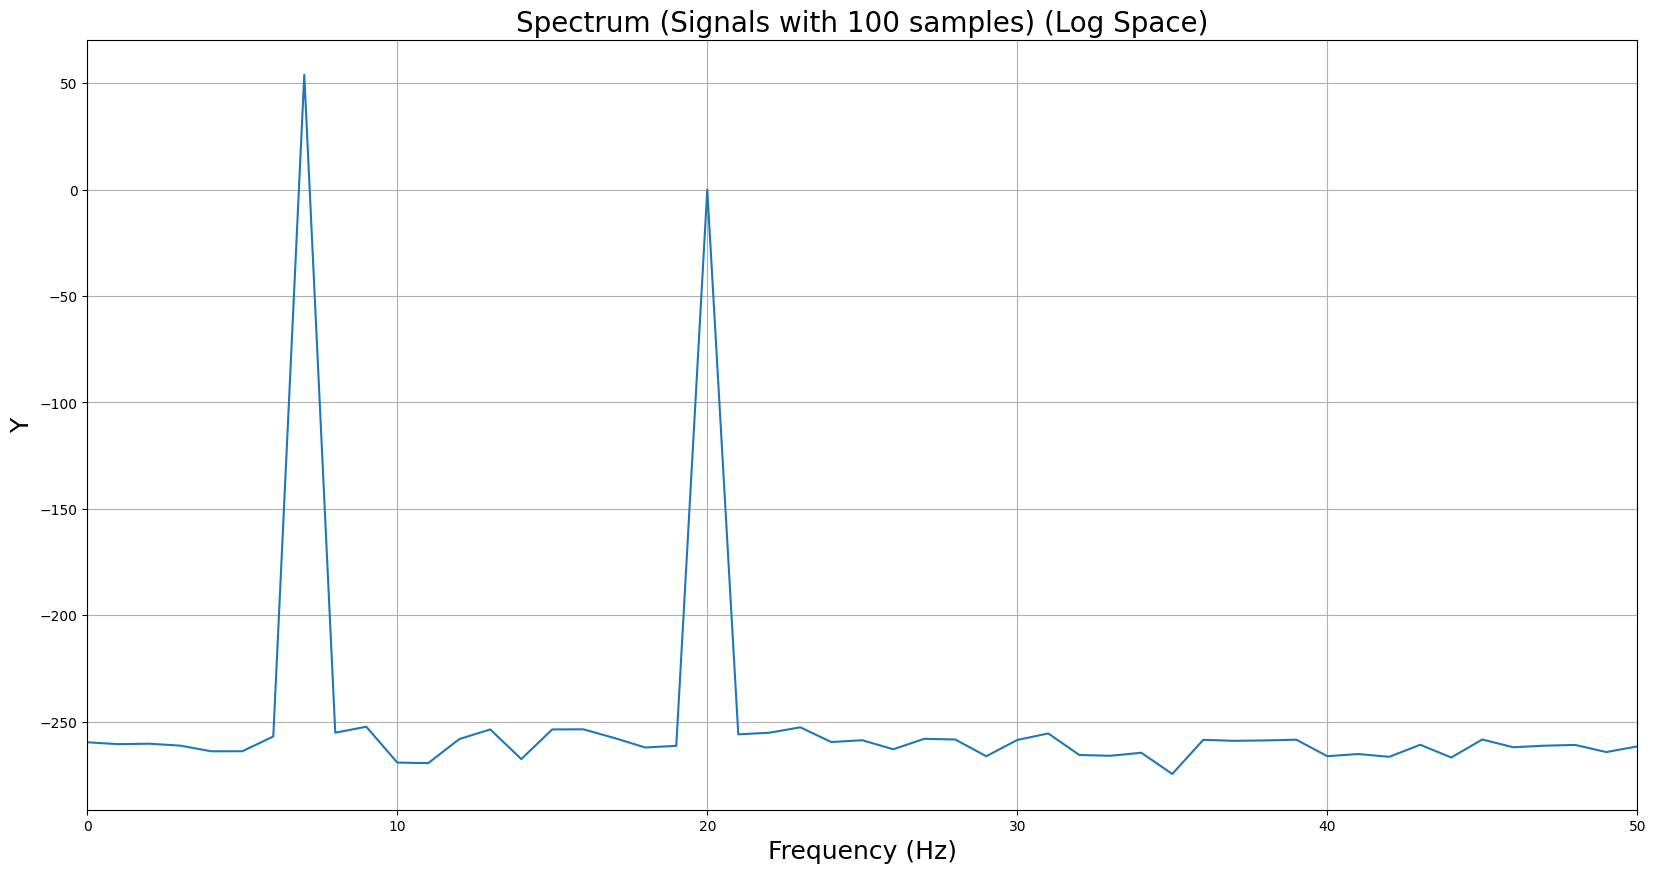

In [662]:
plt.figure(figsize=(20, 10))
plt.plot(fv_100, 20 * np.log10(abs(Y_100)))
plt.title('Spectrum (Signals with 100 samples) (Log Space)', fontsize=20)
plt.xlabel('Frequency [Hz]', fontsize=18)
plt.ylabel('Amplitude [dB]', fontsize=18)
plt.xlim(0, fs / 2)
plt.grid()
plt.show()

### Comparison of signal spectra for signals of 101 and 100 samples

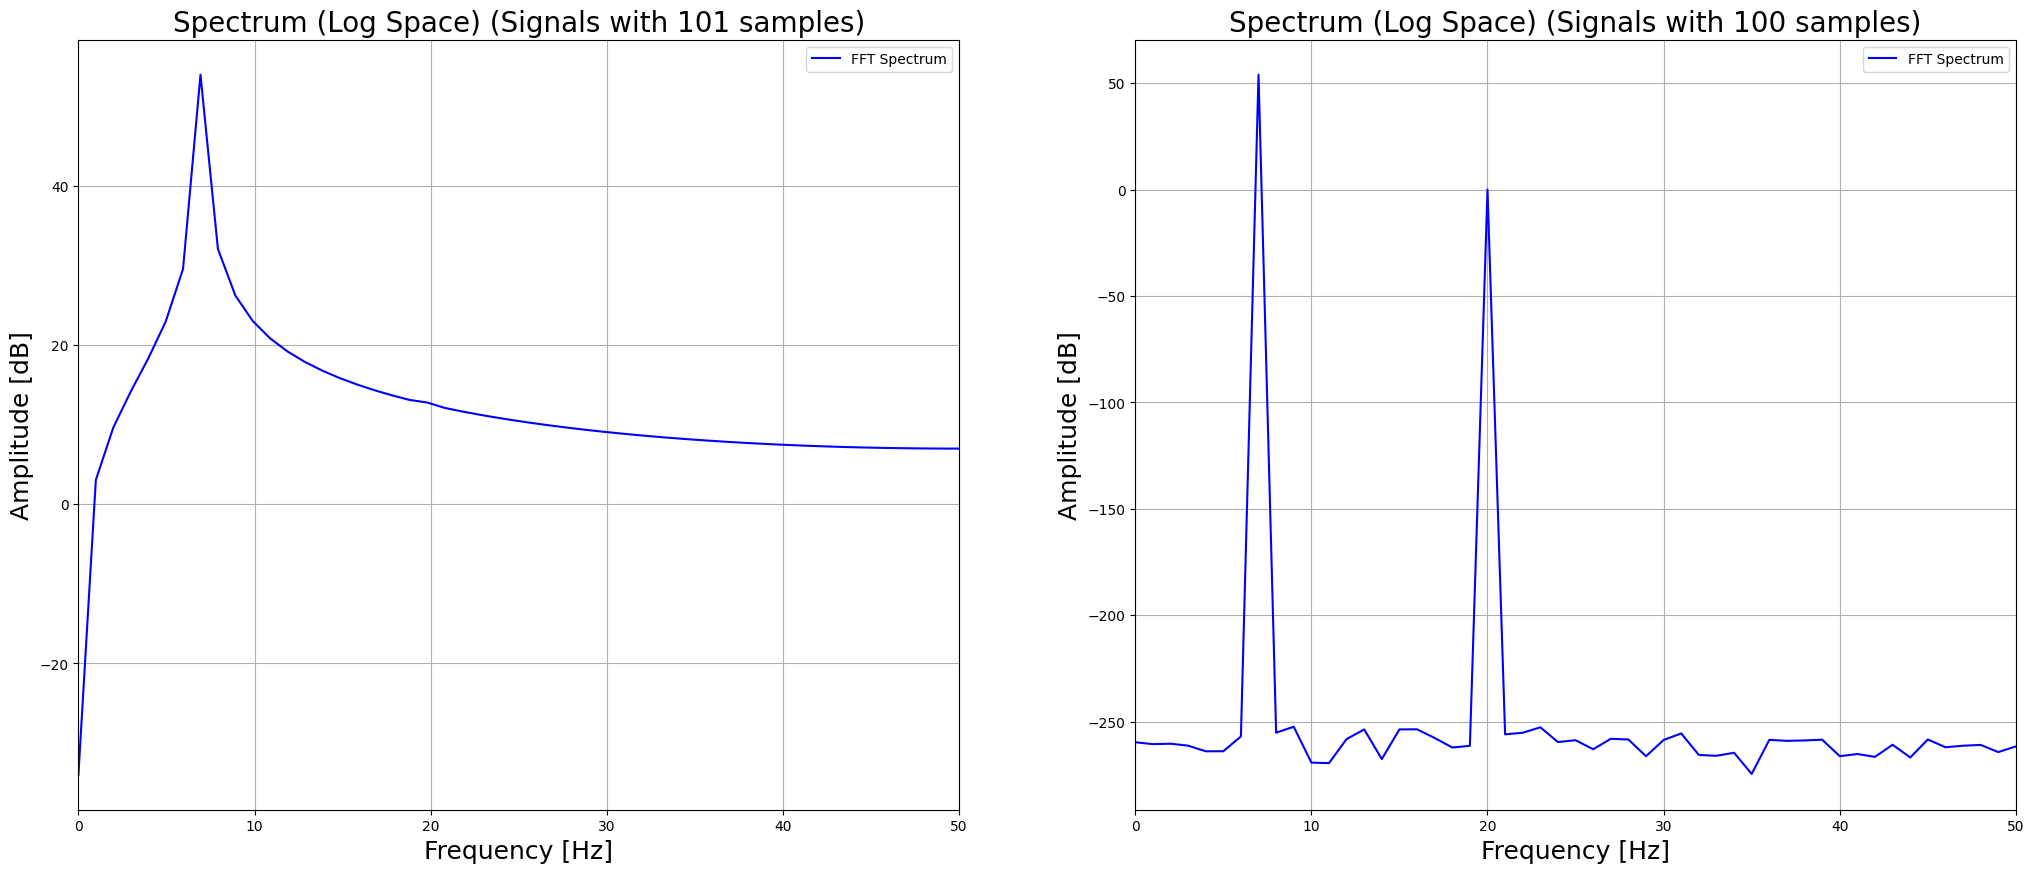

In [663]:
fourier_transformations_dB = [Y_101, Y_100]
frequency_vectors = [fv_101, fv_100]
signal_lengths = [N_101, N_100]

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(25, 10))
for idx, (Y, fv, N) in enumerate(zip(fourier_transformations_dB, frequency_vectors, signal_lengths)):
    Y_dB = 20 * np.log10(abs(Y))

    ax[idx].plot(fv, Y_dB, label="FFT Spectrum", color="blue")

    # Labels and legend
    ax[idx].set_xlabel('Frequency [Hz]', fontsize=18)
    ax[idx].set_ylabel('Amplitude [dB]', fontsize=18)
    ax[idx].set_xlim(0, fs / 2)
    ax[idx].legend()
    ax[idx].grid()

# Titles
ax[0].set_title('Spectrum (Log Space) (Signals with 101 samples)', fontsize=20)
ax[1].set_title('Spectrum (Log Space) (Signals with 100 samples)', fontsize=20)    

plt.show()

What is the reason for the differences between signal spectra?  
The differences between signal spectra are due to the fact that a signal composed of signals with 101 sample lengths does not cover all full cycles.

In which case is spectrum leakage clearly visible?  
In the graph created from signals of length 101, a clear spectrum leakage can be observed, which is provoked by the lack of matching to the full period of the frequency components (does not include all cycles) and discontinuity appears at the ends of the signal.

### 2.3 Apply windowing

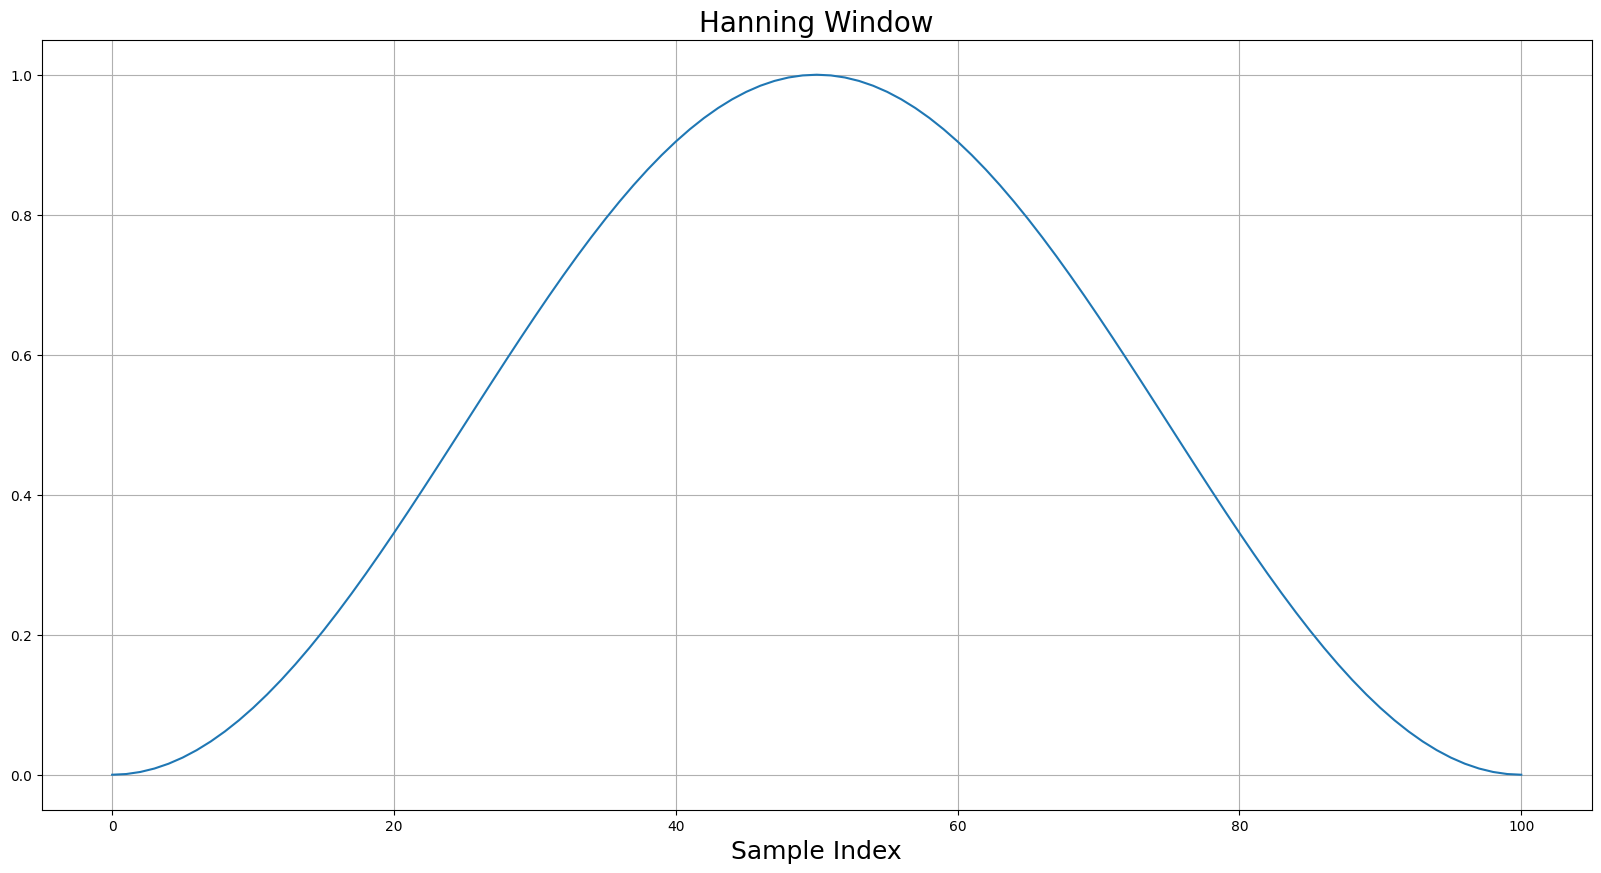

In [664]:
N_hann = len(y_1_101)  # Window length
hanning_window = np.hanning(N_hann)  # Apply hanning window

plt.figure(figsize=(20, 10))
plt.plot(hanning_window)
plt.title('Hanning Window', fontsize=20)
plt.xlabel('Sample Index', fontsize=18)
plt.grid()
plt.show()

In [665]:
# Multiply the signal by hanning window
y_2 = y_1_101 * hanning_window

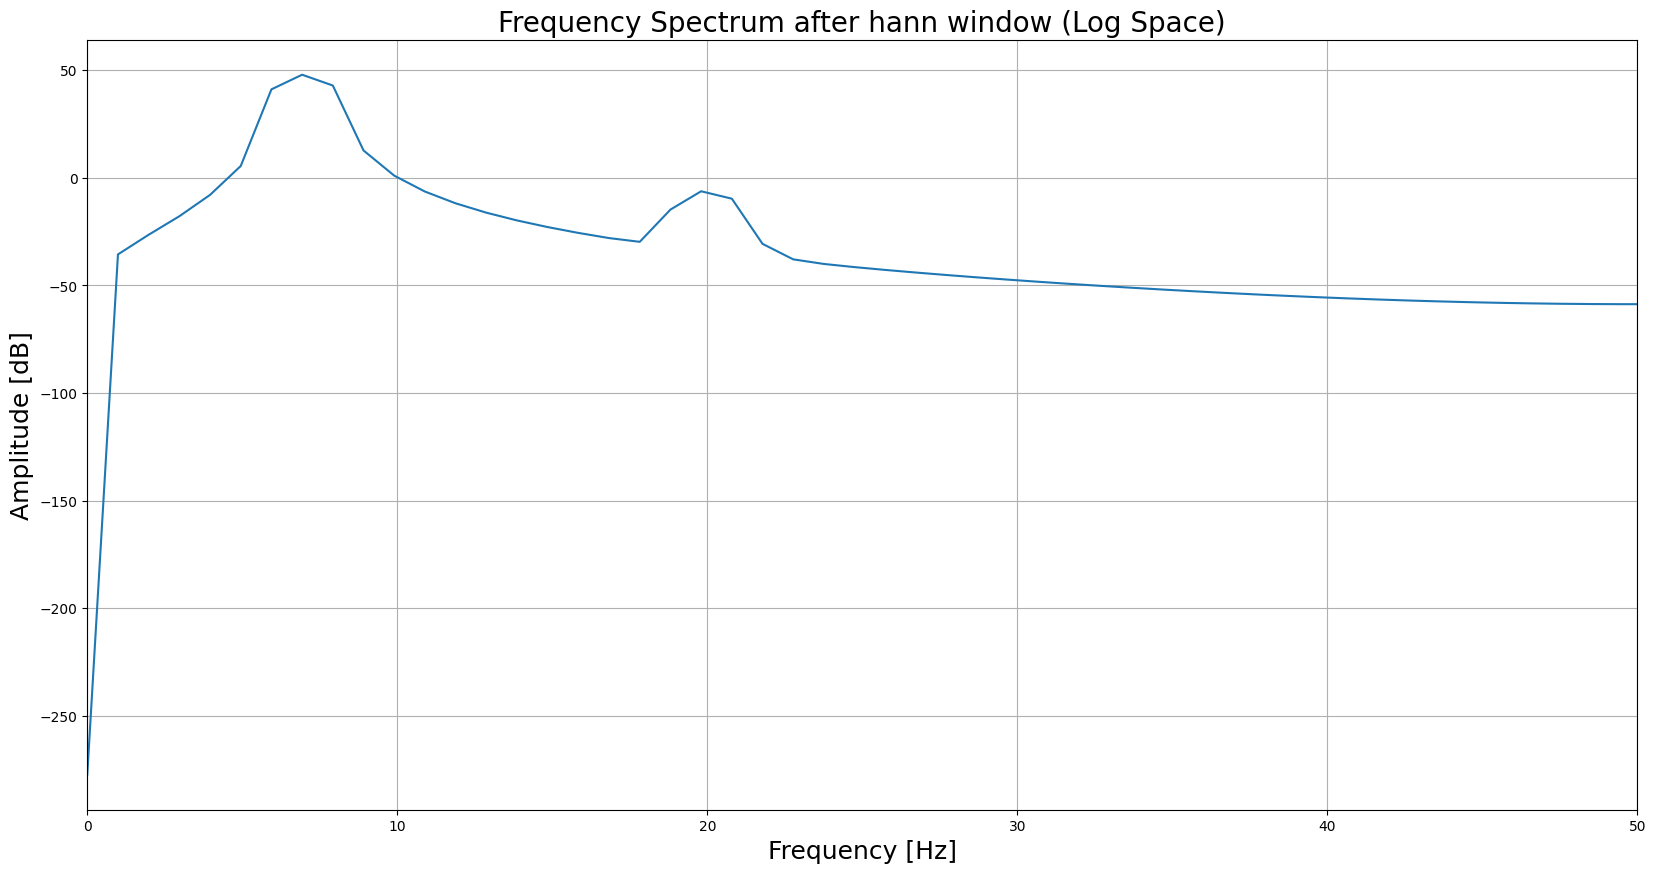

In [666]:
N_y2 = len(y_2)  # Samples (length of signal)
Y_y2 = np.fft.fft(y_2)  # Fourier

plt.figure(figsize=(20, 10))
plt.plot(fv_101, 20 * np.log10(abs(Y_y2)))
plt.title('Frequency Spectrum after hann window (Log Space)', fontsize=20)
plt.xlabel('Frequency [Hz]', fontsize=18)
plt.ylabel('Amplitude [dB]', fontsize=18)
plt.xlim(0, fs / 2)
plt.grid()
plt.show()

### Comparison of signal spectra for original signal and signal after windowing

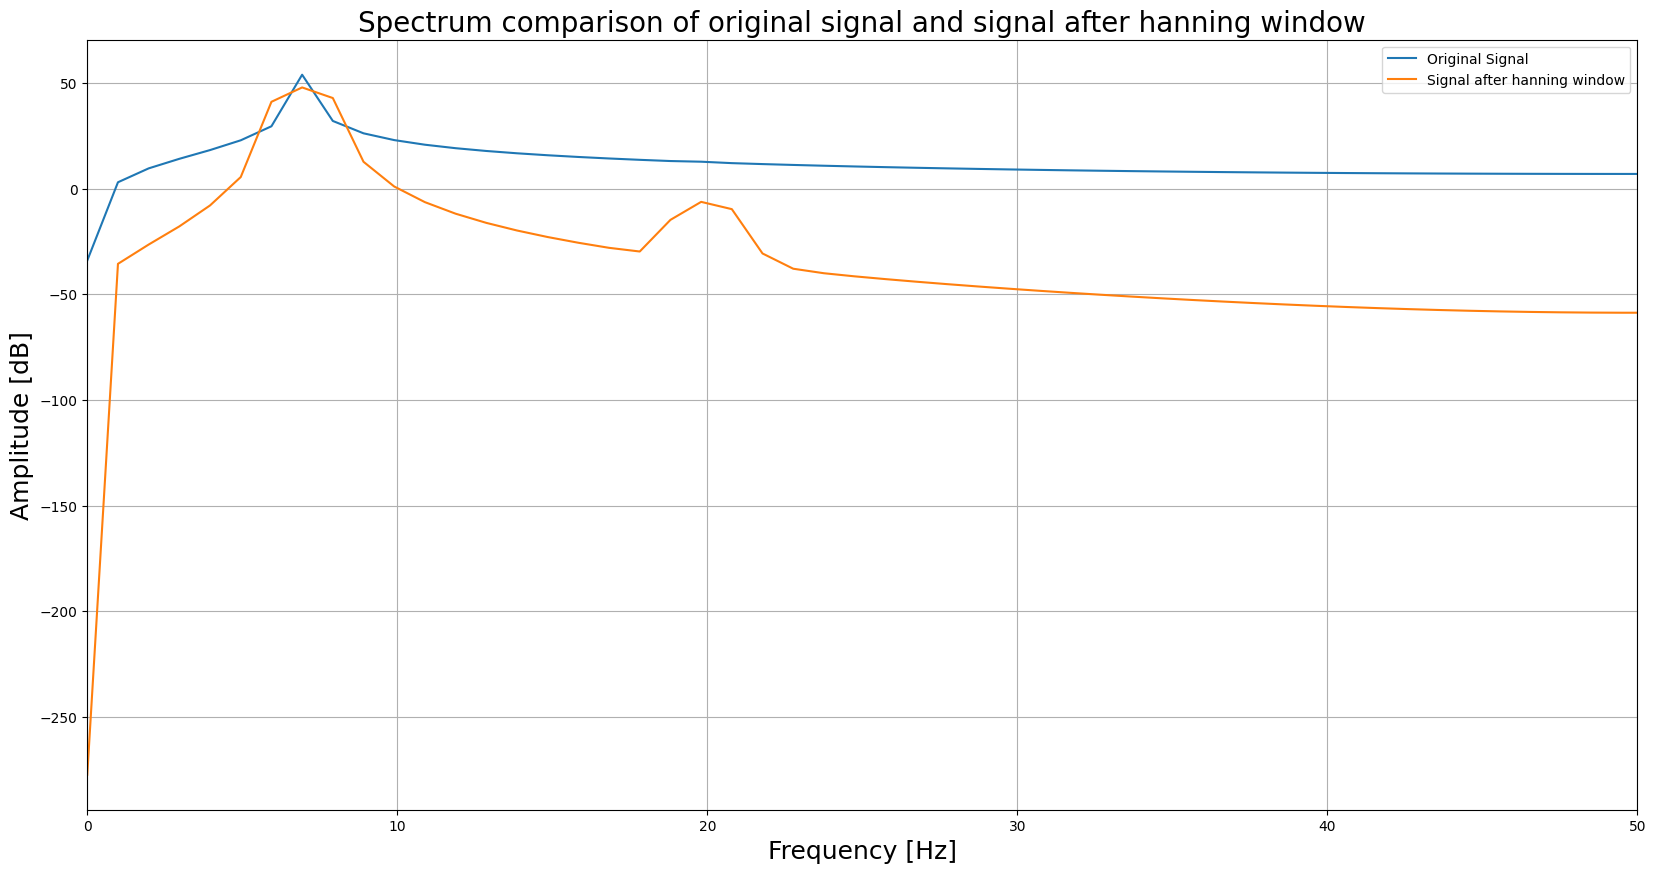

In [667]:
fig = plt.figure(figsize=(20, 10))

# Plot original signal
plt.plot(fv_101, 20 * np.log10(abs(Y_101)), label='Original Signal')
# Plot signal after windowing
plt.plot(fv_101, 20 * np.log10(abs(Y_y2)), label='Signal after hanning window')

plt.title('Spectrum comparison of original signal and signal after hanning window', fontsize=20)
plt.xlabel('Frequency [Hz]', fontsize=18)
plt.ylabel('Amplitude [dB]', fontsize=18)
plt.xlim(0, fs / 2)

plt.grid()
plt.legend()
plt.show()

In the case of a signal composed of signals with lengths of 101 samples, it requires windowing, because in the graph on the left you can see the “spilled” bar to the sides (spectrum leakage), for this reason the bar for the cosine signal is unnoticeable.

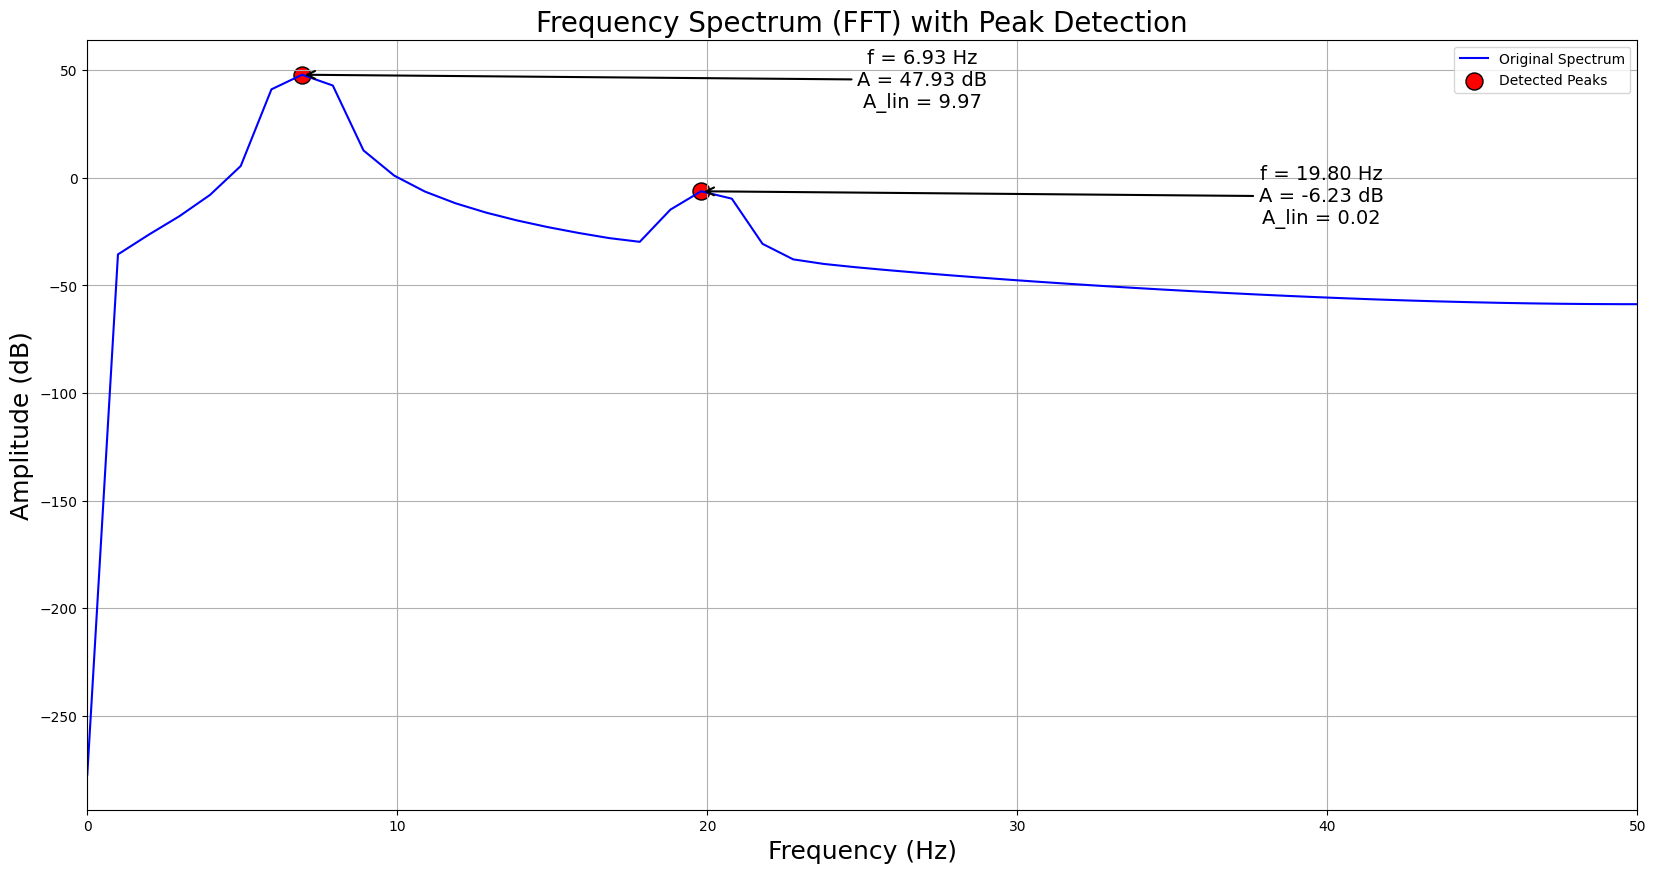

In [668]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter1d

# Compute original FFT magnitude spectrum in dB
Y_dB = 20 * np.log10(np.abs(Y_y2))

# Find peaks using the smoothed spectrum
peaks, _ = find_peaks(Y_dB, height=-10)

# Plot the original spectrum
plt.figure(figsize=(20, 10))
plt.plot(fv_101, Y_dB, label="Original Spectrum", color='blue')

# Highlight detected peaks
plt.scatter(fv_101[peaks], Y_dB[peaks], color='red', s=150, edgecolors='black', label="Detected Peaks")

hanning_correction = 1 / (np.sum(hanning_window) / N_y2)

# Annotate peaks with arrows
N = N_y2  # Długość sygnału dla poprawnej normalizacji
for peak in peaks:
    amplitude_dB = Y_dB[peak]  # Pobieramy oryginalne wartości w dB
    amplitude_linear = ((2 * np.abs(Y_y2[peak])) / N) * hanning_correction
    
    plt.annotate(f"f = {fv_101[peak]:.2f} Hz\nA = {amplitude_dB:.2f} dB\nA_lin = {amplitude_linear:.2f}",
                 xy=(fv_101[peak], amplitude_dB),  # Punkt startowy strzałki
                 xytext=(fv_101[peak] + 20, amplitude_dB - 15),  # Przesunięcie tekstu
                 arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5),
                 fontsize=14,
                 ha='center')

# Labels and legend
plt.title('Frequency Spectrum (FFT) with Peak Detection', fontsize=20)
plt.xlabel('Frequency [Hz]', fontsize=18)
plt.ylabel('Amplitude [dB]', fontsize=18)
plt.xlim(0, fs / 2)
plt.legend()
plt.grid()
plt.show()


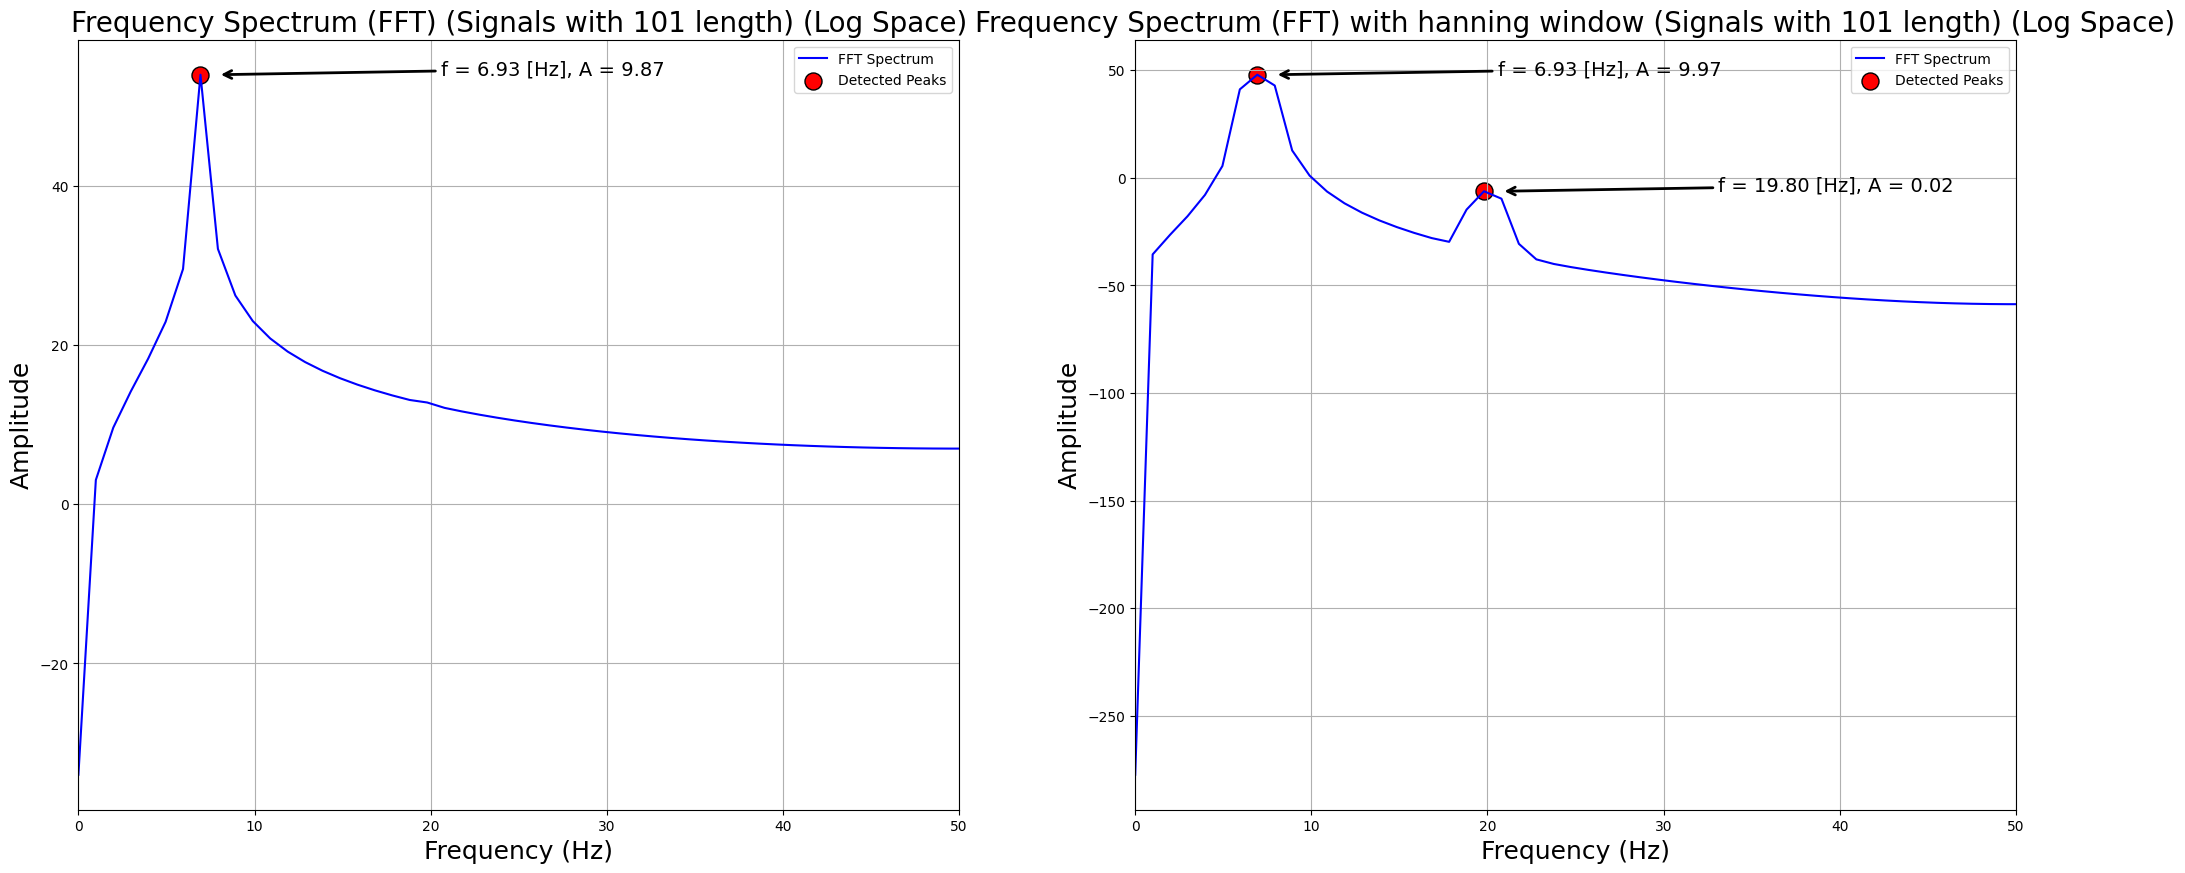

In [669]:
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter1d
from matplotlib.gridspec import GridSpec

fourier_transformations_dB = [Y_101, Y_y2]
frequency_vectors = [fv_101, fv_101]
signal_lengths = [N_101, N_y2]

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(25, 10))


hanning_correction = 1 / (np.sum(hanning_window) / N_y2)

for idx, (Y, fv, N) in enumerate(zip(fourier_transformations_dB, frequency_vectors, signal_lengths)):
    Y_dB = 20 * np.log10(np.abs(Y))
    peaks, _ = find_peaks(Y_dB, height=-10)

    ax[idx].plot(fv, Y_dB, label="FFT Spectrum", color="blue")
    # Add detected peaks
    ax[idx].scatter(fv[peaks], Y_dB[peaks], color='red', s=150, edgecolors='black', label="Detected Peaks")

    # Annotate peaks with arrows
    for peak in peaks[:int(len(peaks) / 2)]:
        f = fv[peak]
        A = ((2 * np.abs(Y[peak])) / N)
        if idx == 1:
            A = A * hanning_correction

        ax[idx].annotate(f"f = {f:.2f} [Hz], A = {A:.2f}",
                    xy=(f + 1, Y_dB[peak]),  # Start paoint of the arrow
                    xytext=(f + 20, Y_dB[peak] + 0.02),  # End point of the arrow
                    arrowprops=dict(facecolor='black', arrowstyle='->', lw=2),
                    fontsize=14,
                    ha='center')

    # Labels and legend
    ax[idx].set_xlabel('Frequency [Hz]', fontsize=18)
    ax[idx].set_ylabel('Amplitude [dB]', fontsize=18)
    ax[idx].set_xlim(0, fs / 2)
    ax[idx].legend()
    ax[idx].grid()

# Titles
ax[0].set_title('Frequency Spectrum (FFT) (Signals with 101 length) (Log Space)', fontsize=20)
ax[1].set_title('Frequency Spectrum (FFT) with hanning window (Signals with 101 length) (Log Space)', fontsize=20)   

plt.show()

The differences between the actual signal frequency values and those on the chart on the right are due to inaccurate frequency resolution and applied hanning window.

## Exercies 3 Sampling Frequency Change

### Creating a signal y

Signal `y` is the sum of:
- Cos_1 -> 1000 Samples, 1000 Sampling Frequency [Hz], 125 Signal Frequency [Hz], 1 Amplitude
- Cos_2 -> 1000 Samples, 1000 Sampling Frequency [Hz], 375 Signal Frequency [Hz], 1 Amplitude

In [155]:
import numpy as np
import matplotlib.pyplot as plt
Ns = 1000  # Samples (Signal length)
fs = 1000  # Sampling frequency

# Cos_1 -> 1000 Samples, 1000 Sampling Frequency [Hz], 125 Signal Frequency [Hz], 1 Amplitude
t, cos_1_125 = create_signal(
    signal=np.cos,
    sign_freq=125,
    sign_amplitude=1,
    sign_length=Ns,
    sampling_freq=fs
)

# Cos_2 -> 1000 Samples, 1000 Sampling Frequency [Hz], 375 Signal Frequency [Hz], 1 Amplitude
t, cos_2_375 = create_signal(
    signal=np.cos,
    sign_freq=375,
    sign_amplitude=1,
    sign_length=Ns,
    sampling_freq=fs
)

y = cos_1_125 + cos_2_375

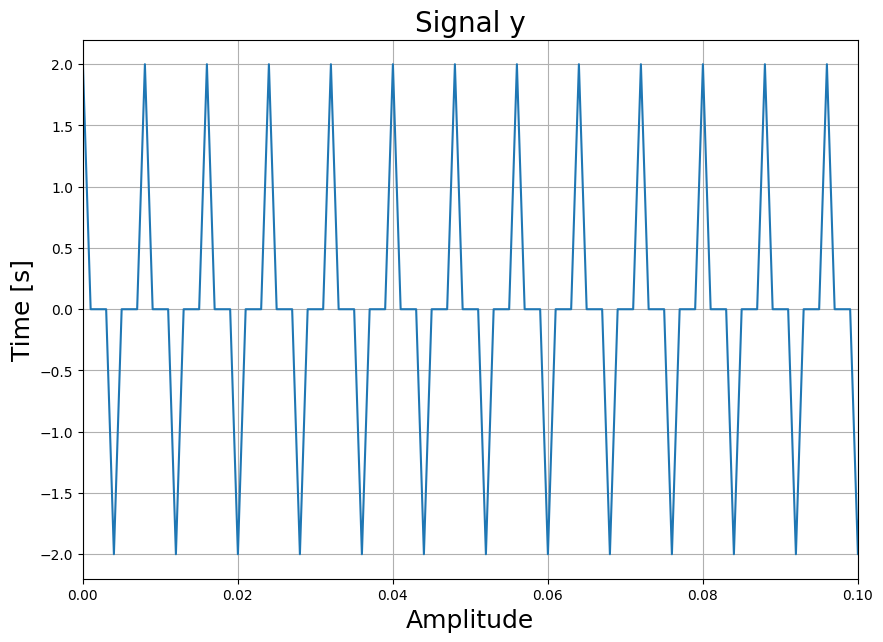

In [156]:
plt.figure(figsize=(10, 7))
plt.plot(t, y)
plt.title('Signal y', fontsize=20)
plt.xlabel('Amplitude', fontsize=18)
plt.ylabel('Time [s]', fontsize=18)
plt.grid()
plt.xlim(0, 0.1)
plt.show()

### Fourier Transformation

In [157]:
# Fourier transformation
N = y.shape[0]
Y = (abs(np.fft.fft(y)) / N) * 2
df = fs / N                   # Frequency resolution
fv = np.arange(0, N) * df     # Frequency vector

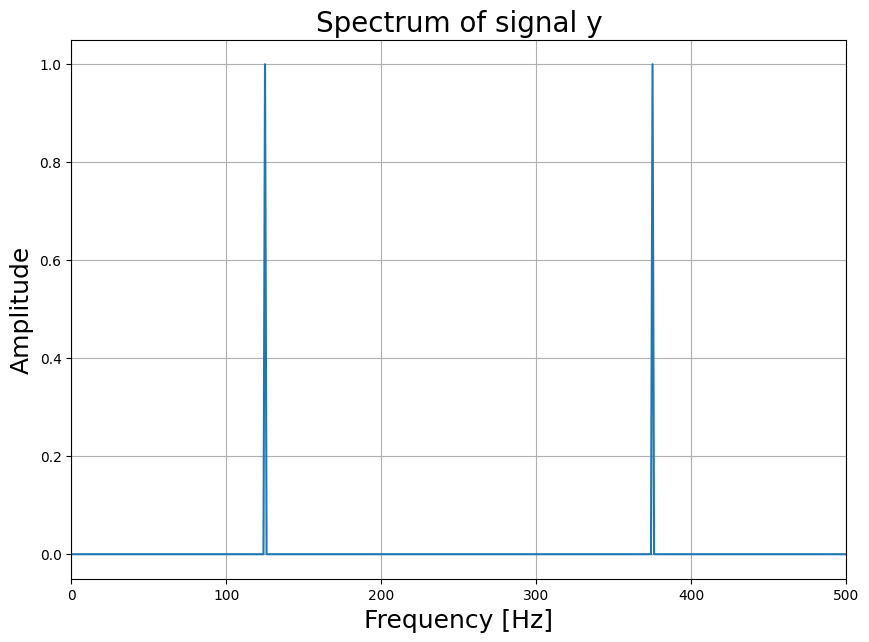

In [158]:
plt.figure(figsize=(10, 7))
plt.plot(fv, Y)
plt.title('Spectrum of signal y', fontsize=20)
plt.xlabel('Frequency [Hz]', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
plt.xlim(0, fs / 2)
plt.grid()
plt.show()

### Subsampling the signal, preserving every second sample from the original signal

In [159]:
y_sub = y[::2]
fs_sub = fs / 2

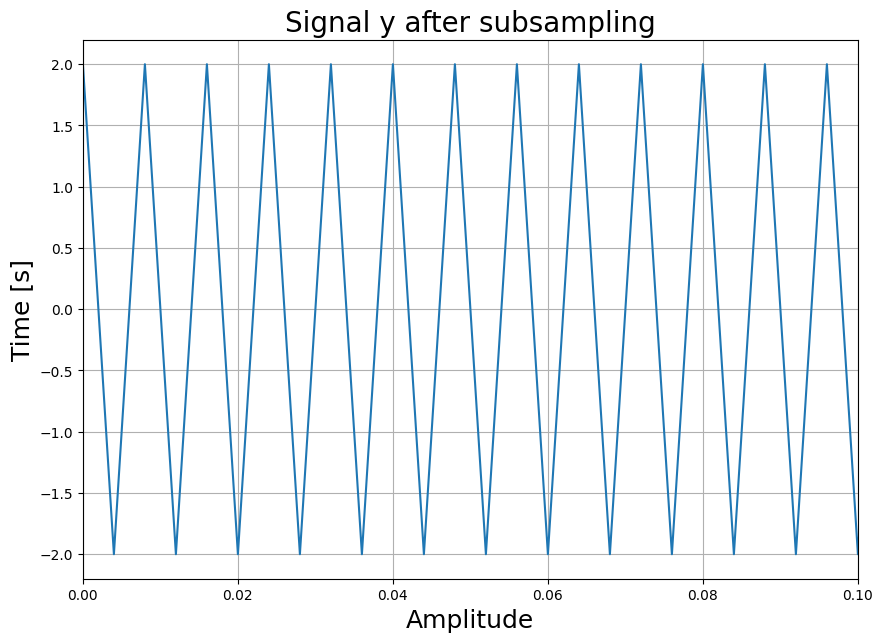

In [160]:
dt_sub = 1 / fs_sub
t_sub = np.arange(y_sub.shape[0]) * dt_sub

plt.figure(figsize=(10, 7))
plt.plot(t_sub, y_sub)
plt.title('Signal y after subsampling', fontsize=20)
plt.xlabel('Amplitude', fontsize=18)
plt.ylabel('Time [s]', fontsize=18)
plt.grid()
plt.xlim(0, 0.1)
plt.show()

### Fourier Transformation for subsampled signal y

In [146]:
# Fourier transformation
N_sub = y_sub.shape[0]
Y_sub = (abs(np.fft.fft(y_sub)) / N_sub) * 2
df_sub = fs_sub / N_sub                       # Frequency resolution
fv_sub = np.arange(0, N_sub) * df_sub         # Frequency vector

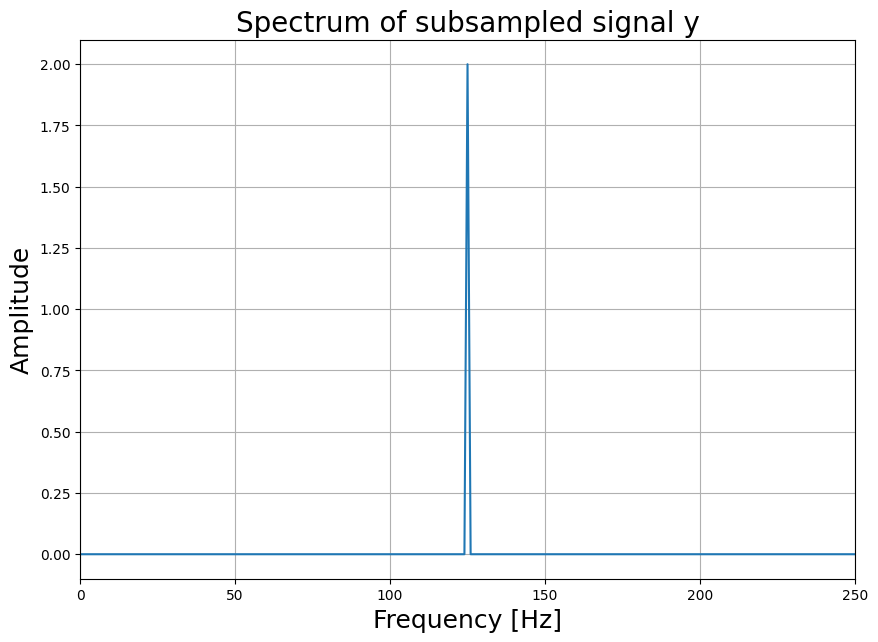

In [147]:
plt.figure(figsize=(10, 7))
plt.plot(fv_sub, Y_sub)
plt.title('Spectrum of subsampled signal y', fontsize=20)
plt.xlabel('Frequency [Hz]', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
plt.xlim(0, fv_sub.shape[0] / 2)
plt.grid()
plt.show()

## Repeating the above example for two other cases:  
a) for a signal y consisting of the sum of two sinusoids with frequencies of 125 and 375 Hz.  
b) for a signal y consisting of the difference of cosine with frequencies of 125 and 375 Hz (cos(a)-cos(b))  


## a)

### Creating a signal y

Signal `y` is the sum of:
- Sin_1 -> 1000 Samples, 1000 Sampling Frequency [Hz], 125 Signal Frequency [Hz], 1 Amplitude
- Sin_2 -> 1000 Samples, 1000 Sampling Frequency [Hz], 375 Signal Frequency [Hz], 1 Amplitude

In [161]:
Ns = 1000  # Samples (Signal length)
fs = 1000  # Sampling frequency

# Sin_1 -> 1000 Samples, 1000 Sampling Frequency [Hz], 125 Signal Frequency [Hz], 1 Amplitude
t, sin_1_125 = create_signal(
    signal=np.sin,
    sign_freq=125,
    sign_amplitude=1,
    sign_length=Ns,
    sampling_freq=fs
)

# Sin_2 -> 1000 Samples, 1000 Sampling Frequency [Hz], 375 Signal Frequency [Hz], 1 Amplitude
t, sin_2_375 = create_signal(
    signal=np.sin,
    sign_freq=375,
    sign_amplitude=1,
    sign_length=Ns,
    sampling_freq=fs
)

y = sin_1_125 + sin_2_375

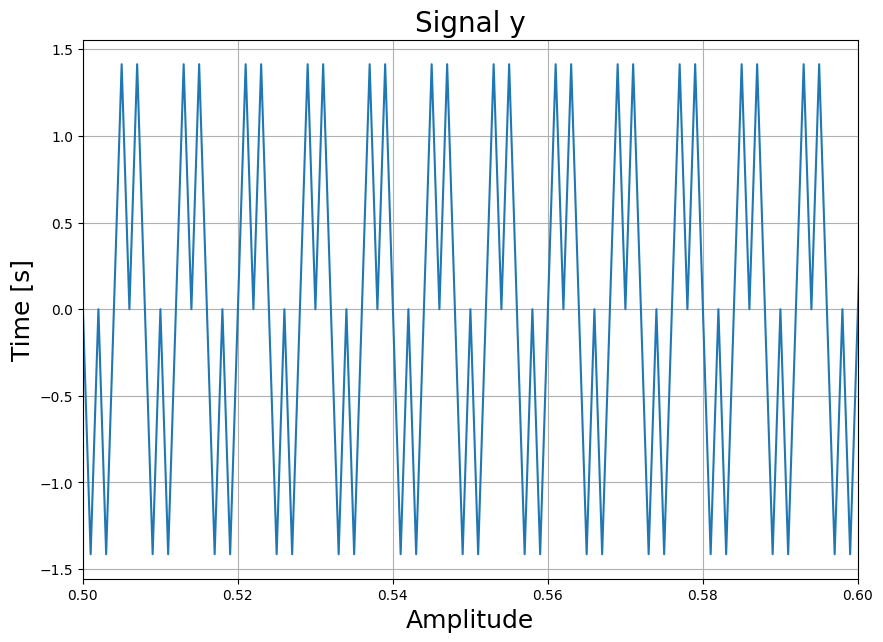

In [162]:
plt.figure(figsize=(10, 7))
plt.plot(t, y)
plt.title('Signal y', fontsize=20)
plt.xlabel('Amplitude', fontsize=18)
plt.ylabel('Time [s]', fontsize=18)
plt.grid()
plt.xlim(0.5, 0.6)
plt.show()

### Fourier Trnasformation

In [163]:
N = y.shape[0]
Y = abs(np.fft.fft(y) / N) * 2
df = fs / N
fv = np.arange(N) * df

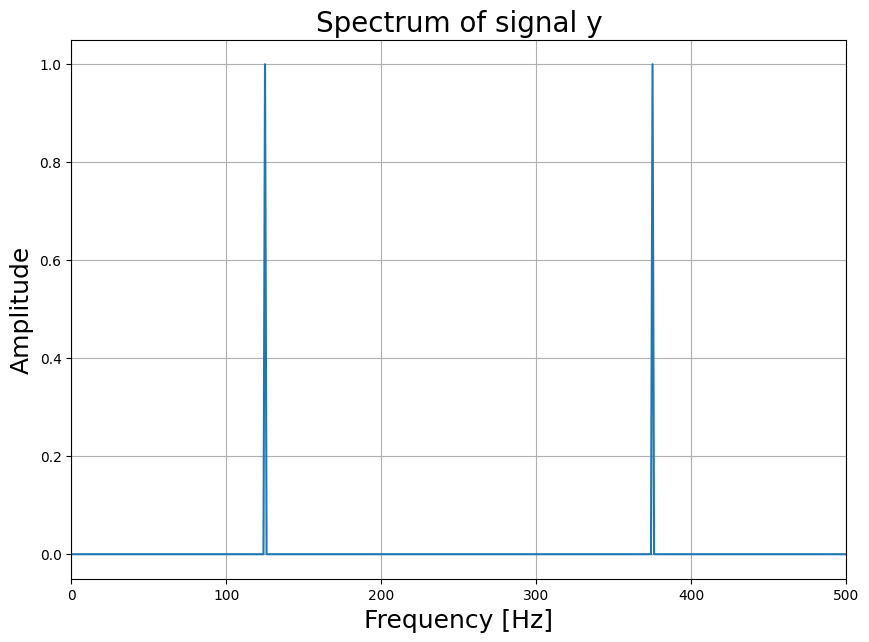

In [164]:
plt.figure(figsize=(10, 7))
plt.plot(fv, Y)
plt.title('Spectrum of signal y', fontsize=20)
plt.xlabel('Frequency [Hz]', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
plt.xlim(0, fs / 2)
plt.grid()
plt.show()

### Subsampling the signal, preserving every second sample from the original signal

In [165]:
y_sub = y[::2]
fs_sub = fs / 2

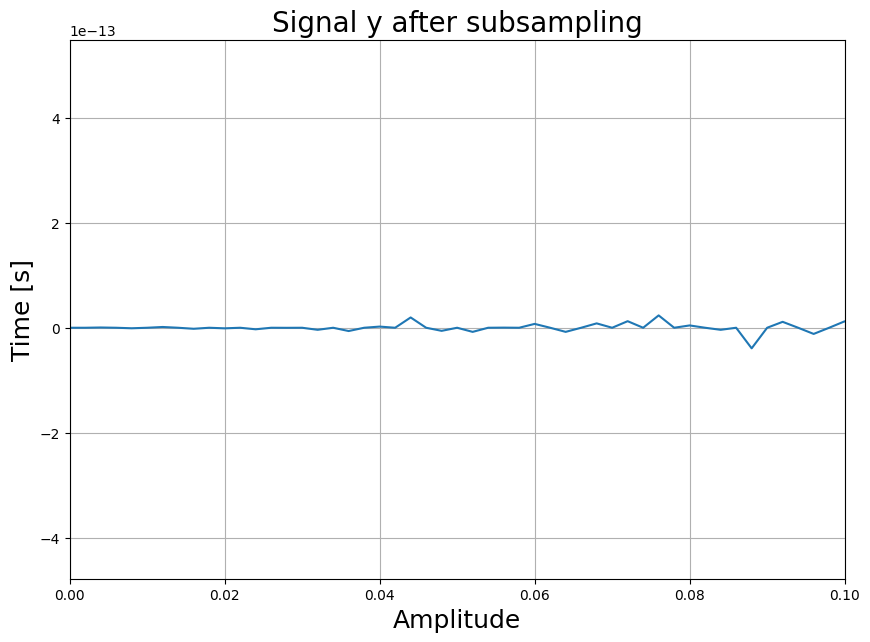

In [166]:
t_sub = np.arange(y_sub.shape[0]) * (1 / fs_sub)

plt.figure(figsize=(10, 7))
plt.plot(t_sub, y_sub)
plt.title('Signal y after subsampling', fontsize=20)
plt.xlabel('Amplitude', fontsize=18)
plt.ylabel('Time [s]', fontsize=18)
plt.grid()
plt.xlim(0, 0.1)
plt.show()

### Fourier transformation for subsampled signal y

In [22]:
N_sub = y_sub.shape[0]
Y_sub = abs(np.fft.fft(y_sub) / N_sub) * 2
df_sub = fs_sub / N_sub
fv_sub = np.arange(N_sub) * df_sub

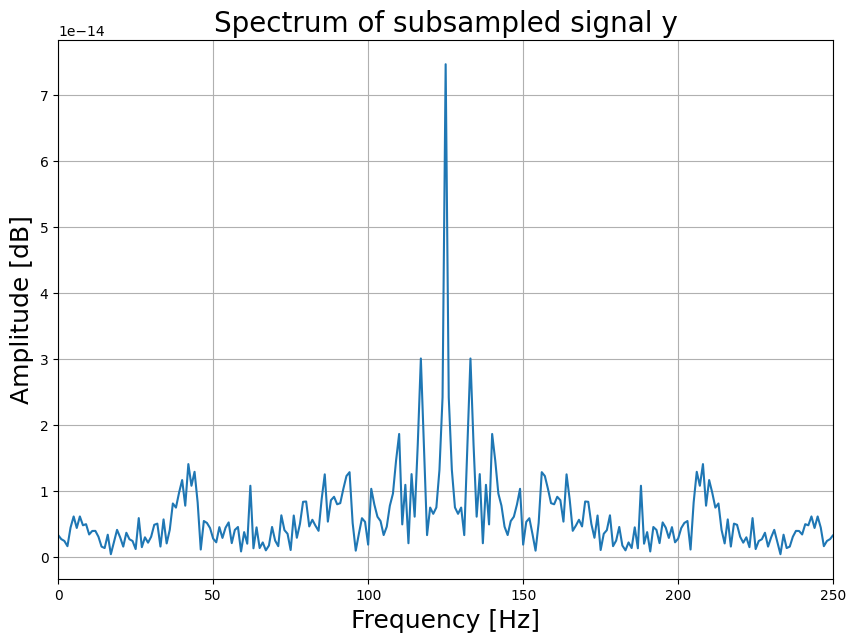

In [23]:
plt.figure(figsize=(10, 7))
plt.plot(fv_sub, Y_sub)
plt.title('Spectrum of subsampled signal y', fontsize=20)
plt.xlabel('Frequency [Hz]', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
plt.xlim(0, fv_sub.shape[0] / 2)
plt.grid()
plt.show()